In [7]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('C:\Users\Student\Desktop\consumer_complaints.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-3-a244e073da4e>, line 1)

In [6]:
df = pd.read_csv('C:\Users\Student\Desktop\consumer_complaints.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-6-a244e073da4e>, line 1)

In [8]:
df=pd.read_csv('C:\Users\Student\Desktop\consumer_complaints.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-8-8372e8249afe>, line 1)

In [9]:
cd C:\Users\Student\Desktop

C:\Users\Student\Desktop


In [10]:
df = pd.read_csv('consumer_complaints.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
date_received                   555957 non-null object
product                         555957 non-null object
sub_product                     397635 non-null object
issue                           555957 non-null object
sub_issue                       212622 non-null object
consumer_complaint_narrative    66806 non-null object
company_public_response         85124 non-null object
company                         555957 non-null object
state                           551070 non-null object
zipcode                         551452 non-null object
tags                            77959 non-null object
consumer_consent_provided       123458 non-null object
submitted_via                   555957 non-null object
date_sent_to_company            555957 non-null object
company_response_to_consumer    555957 non-null object
timely_response                 555957 non-null object
consumer_dis

In [12]:
df[pd.isnull(df['issue'])]

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id


In [13]:
df['sub_product'].fillna('Not Provided',inplace=True)

In [14]:
df['sub_issue'].fillna('Not Provided',inplace=True)

In [15]:
df['consumer_complaint_narrative'].fillna('None or Not Provided',inplace=True)

In [16]:
df['company_public_response'].fillna('Company chooses not to provide',inplace=True)

In [17]:
df['tags'].fillna('Unknown',inplace=True) 

In [18]:
df['submitted_via'].fillna('Other',inplace=True)

In [19]:
df['consumer_consent_provided'].fillna('Consent not provided',inplace=True) 
df['consumer_consent_provided']=df['consumer_consent_provided'].apply(lambda x: 
            'Consent not provided' if x=='Other' or x=='Consent withdrawn' else x)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
date_received                   555957 non-null object
product                         555957 non-null object
sub_product                     555957 non-null object
issue                           555957 non-null object
sub_issue                       555957 non-null object
consumer_complaint_narrative    555957 non-null object
company_public_response         555957 non-null object
company                         555957 non-null object
state                           551070 non-null object
zipcode                         551452 non-null object
tags                            555957 non-null object
consumer_consent_provided       555957 non-null object
submitted_via                   555957 non-null object
date_sent_to_company            555957 non-null object
company_response_to_consumer    555957 non-null object
timely_response                 555957 non-null object
consumer_

In [21]:
from pyzipcode import Pyzipcode as zip

ImportError: No module named 'pyzipcode'

In [22]:
from pyzipcode import Pyzipcode as zip

ImportError: No module named 'pyzipcode'

In [23]:
df['state'].value_counts(dropna=False)
pd.isnull(df['state']).value_counts()

False    551070
True       4887
Name: state, dtype: int64

In [24]:
df[pd.isnull(df['state'])&pd.isnull(df['zipcode'])].shape

(4495, 18)

In [25]:
df['state'].fillna('Not provided',inplace=True)
df['zipcode'].fillna('Not Provided',inplace=True)

In [26]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Not Provided,None or Not Provided,Company chooses not to provide,U.S. Bancorp,CA,95993,Unknown,Consent not provided,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",Not Provided,None or Not Provided,Company chooses not to provide,Wells Fargo & Company,CA,91104,Unknown,Consent not provided,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,Not Provided,Incorrect information on credit report,Account status,None or Not Provided,Company chooses not to provide,Wells Fargo & Company,NY,11764,Unknown,Consent not provided,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,None or Not Provided,Company chooses not to provide,"Navient Solutions, Inc.",MD,21402,Unknown,Consent not provided,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,None or Not Provided,Company chooses not to provide,Resurgent Capital Services L.P.,GA,30106,Unknown,Consent not provided,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [27]:
print (df.groupby(df['consumer_disputed?'])['date_received'])

In [28]:
temp5 = pd.crosstab(df['consumer_consent_provided'], df['consumer_disputed?'])
temp5

consumer_disputed?,No,Yes
consumer_consent_provided,,
Consent not provided,392593,96557
Consent provided,51230,15577


In [29]:
replace={'Yes':True, 'No':False}

In [30]:
df['consumer_disputed?']= df['consumer_disputed?'].apply(lambda x: replace[x])

In [31]:
df_model = DataFrame()

In [33]:
replace1={'Consent provided':True, 'Consent not provided':False}
df_model['consumer_consent_provided']= df['consumer_consent_provided'].apply(lambda x: replace1[x])

In [38]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 10 columns):
consumer_consent_provided       555957 non-null bool
company_complaint_counts        555957 non-null int64
product                         555957 non-null category
sub_product                     555957 non-null category
issue                           555957 non-null category
sub_issue                       555957 non-null category
company_public_response         555957 non-null category
tags                            555957 non-null category
company_response_to_consumer    555957 non-null category
state                           555957 non-null category
dtypes: bool(1), category(8), int64(1)
memory usage: 9.0 MB


In [35]:
company_complaitns_counts = df['company'].value_counts()
df_model['company_complaint_counts'] = df['company'].apply(lambda x: company_complaitns_counts[x])

In [36]:
feature_for_model=['product', 'sub_product','issue','sub_issue', 'company_public_response','tags',
                'company_response_to_consumer', 'state']

In [37]:
for name in feature_for_model:
    repl={}
    i=0
    for value in df[name].unique():
        repl[value] = i
        i+=1
       
    df[name] = df[name].apply(lambda x: repl[x])
    df_model[name] = df[name].astype('category')

In [39]:
df['Process time']=(df['date_sent_to_company']-df['date_received']).astype('timedelta64[D]').astype(int)
df_model=pd.concat([df_model,df['Process time']],axis=1)

df['timely_response'] = df['timely_response'].apply(lambda x: replace[x])
df_model=pd.concat([df_model,df['timely_response']],axis=1)

##Create features about complaint submitted time
df_model['Date_received_year'] = df['date_received'].apply(lambda x: x.year)
df_model['Date_received_month'] = df['date_received'].apply(lambda x: x.month)
df_model['Date_received_day'] = df['date_received'].apply(lambda x: x.day)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [40]:
df['Process time']=(df['date_sent_to_company']-df['date_received']).astype('timedelta64[D]').astype(int)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [42]:
df['Process time']=(df['date_sent_to_company'] - df['date_received']).astype('timedelta64[D]').astype(int)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [43]:
df['timely_response'] = df['timely_response'].apply(lambda x: replace[x])
df_model=pd.concat([df_model,df['timely_response']],axis=1)

In [44]:
df_model['Date_received_year'] = df['date_received'].apply(lambda x: x.year)
df_model['Date_received_month'] = df['date_received'].apply(lambda x: x.month)
df_model['Date_received_day'] = df['date_received'].apply(lambda x: x.day)

AttributeError: 'str' object has no attribute 'year'

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
date_received                   555957 non-null object
product                         555957 non-null int64
sub_product                     555957 non-null int64
issue                           555957 non-null int64
sub_issue                       555957 non-null int64
consumer_complaint_narrative    555957 non-null object
company_public_response         555957 non-null int64
company                         555957 non-null object
state                           555957 non-null int64
zipcode                         555957 non-null object
tags                            555957 non-null int64
consumer_consent_provided       555957 non-null object
submitted_via                   555957 non-null object
date_sent_to_company            555957 non-null object
company_response_to_consumer    555957 non-null int64
timely_response                 555957 non-null bool
consumer_disputed? 

In [46]:
df_model.head().T

,0,1,2,3,4
consumer_consent_provided,False,False,False,False,False
company_complaint_counts,9554,42024,42024,8007,1678
product,0,0,1,2,3
sub_product,0,0,1,2,3
issue,0,1,2,3,4
sub_issue,0,0,1,2,3
company_public_response,0,0,0,0,0
tags,0,0,0,0,0
company_response_to_consumer,0,0,0,0,0
state,0,0,1,2,3


In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
import sklearn.metrics as skm
from sklearn.pipeline import Pipeline
from scipy import interp
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
X = df_model.values

y = df['consumer_disputed?'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [49]:
X_train.shape

(444765, 11)

In [50]:
y_train.shape

(444765,)

In [51]:
X_test.shape

(111192, 11)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [53]:
lr = LogisticRegression(class_weight='auto')

In [54]:
lr.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
lr.score(X_test,y_test)

0.51804086624937051

In [56]:
skm.roc_auc_score(y_test, v_probs)

NameError: name 'v_probs' is not defined

In [57]:
v_probs = lr.predict_proba(X_test)[:, 1]

In [58]:
v_train=lr.predict_proba(X_train)[:,1]

In [59]:
skm.roc_auc_score(y_test, v_probs)

0.55828156140851992

In [60]:
pd.crosstab(y_test, lr.predict(X_test))

col_0,False,True
row_0,,
False,44604,44088
True,9502,12998


In [61]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 11 columns):
consumer_consent_provided       555957 non-null bool
company_complaint_counts        555957 non-null int64
product                         555957 non-null category
sub_product                     555957 non-null category
issue                           555957 non-null category
sub_issue                       555957 non-null category
company_public_response         555957 non-null category
tags                            555957 non-null category
company_response_to_consumer    555957 non-null category
state                           555957 non-null category
timely_response                 555957 non-null bool
dtypes: bool(2), category(8), int64(1)
memory usage: 9.5 MB


In [64]:
df_model_new=df_model[:,1]

TypeError: unhashable type: 'slice'

In [65]:
X_train.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [66]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 11 columns):
consumer_consent_provided       555957 non-null bool
company_complaint_counts        555957 non-null int64
product                         555957 non-null category
sub_product                     555957 non-null category
issue                           555957 non-null category
sub_issue                       555957 non-null category
company_public_response         555957 non-null category
tags                            555957 non-null category
company_response_to_consumer    555957 non-null category
state                           555957 non-null category
timely_response                 555957 non-null bool
dtypes: bool(2), category(8), int64(1)
memory usage: 9.5 MB


In [67]:
del df_model['company_complaint_counts']

In [68]:
X = df_model.values

y = df['consumer_disputed?'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [69]:
X_train.shape

(444765, 10)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [71]:
lr = LogisticRegression(class_weight='auto')

lr.fit(X_train, y_train)

lr.score(X_test,y_test)

C:\Anaconda3\lib\site-packages\sklearn\utils\class_weight.py:62: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


0.51835563709619392

In [72]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 10 columns):
consumer_consent_provided       555957 non-null bool
product                         555957 non-null category
sub_product                     555957 non-null category
issue                           555957 non-null category
sub_issue                       555957 non-null category
company_public_response         555957 non-null category
tags                            555957 non-null category
company_response_to_consumer    555957 non-null category
state                           555957 non-null category
timely_response                 555957 non-null bool
dtypes: bool(2), category(8)
memory usage: 5.3 MB


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
date_received                   555957 non-null object
product                         555957 non-null int64
sub_product                     555957 non-null int64
issue                           555957 non-null int64
sub_issue                       555957 non-null int64
consumer_complaint_narrative    555957 non-null object
company_public_response         555957 non-null int64
company                         555957 non-null object
state                           555957 non-null int64
zipcode                         555957 non-null object
tags                            555957 non-null int64
consumer_consent_provided       555957 non-null object
submitted_via                   555957 non-null object
date_sent_to_company            555957 non-null object
company_response_to_consumer    555957 non-null int64
timely_response                 555957 non-null bool
consumer_disputed? 

In [74]:
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1, class_weight='auto', max_features=1)

In [75]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
rfc.score(X_test,y_test)

0.59340600043168579

In [77]:
def plot_importance(clf, X, max_features = 18):
    '''Plot feature importance'''
    feature_importance=clf.feature_importances_
    feature_importance=100.0*(feature_importance/feature_importance.max())
    sorted_idx=np.argsort(feature_importance)
    pos=np.arange(sorted_idx.shape[0])+.5
    
    pos=pos[-max_features:]
    feature_importance=(feature_importance[sorted_idx])[-max_features:]
    features_names=(X.columns[sorted_idx])[-max_features:]
    mycolors='rgb'
    plt.barh(pos, feature_importance, align='center',color=mycolors)
    plt.yticks(pos,features_names)
    plt.xlabel('Relative Importnace')
    plt.title('Variable Importnace')

AttributeError: 'NoneType' object has no attribute 'T'

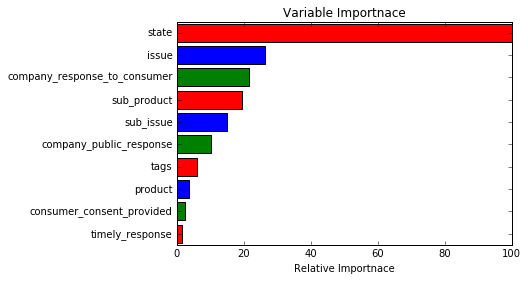

In [81]:
plot_importance(rfc, df_model, max_features=18)

In [79]:
%matplotlib inline